In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from matplotlib.pyplot import subplots

from scipy.stats import chi2_contingency
from tabulate import tabulate

In [30]:
listings = pd.read_csv("../project_data/inside_airbnb/ca/los-angeles/listings.csv")
listings_dropped = listings.drop(['listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'neighbourhood', 'bathrooms', 'amenities', 
       'calendar_last_scraped', 'first_review', 'last_review', 'license', 'host_verifications', 'calendar_updated'], axis="columns")

# pacific_grove_listings = pd.read_csv("inside_airbnb/ca/los-angeles/listings.csv")

In [31]:
small_listings = listings_dropped.sample(frac = 0.1)
small_listings

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
25755,51715442,within an hour,100%,97%,f,2.0,2.0,t,t,Gramercy Park,...,5.00,5.00,5.00,4.86,t,1,1,0,0,3.18
7925,19972024,NaN,NaN,NaN,f,1.0,1.0,t,f,Venice,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
36633,25671745,within an hour,100%,99%,t,17.0,17.0,t,t,Fountain Valley,...,4.98,4.99,4.88,4.91,f,14,7,7,0,2.84
9872,23401362,within an hour,100%,100%,t,1.0,1.0,t,t,Woodland Hills,...,4.99,4.99,4.99,4.97,f,1,1,0,0,7.80
13867,32905778,within a day,60%,73%,t,0.0,0.0,t,t,Marina del Rey,...,4.96,4.92,4.96,4.79,f,1,1,0,0,1.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7102,18039862,within a day,78%,70%,t,1.0,1.0,t,t,Studio City,...,4.92,5.00,4.96,4.92,f,1,0,1,0,0.41
11814,28086752,NaN,NaN,NaN,f,1.0,1.0,t,t,Winnetka,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
19148,43770721,within an hour,100%,100%,t,25.0,25.0,t,t,Malibu,...,4.97,4.94,4.94,4.70,f,5,5,0,0,2.76
26038,51982571,within an hour,100%,100%,t,273.0,273.0,t,t,Sherman Oaks,...,5.00,5.00,5.00,5.00,t,269,2,267,0,0.23


In [32]:
# Taken from: https://github.com/apaljug/apaljug.CS7641-Group2.io/blob/main/Song%20Data%20Exploration.ipynb

# Function for plotting a histogram of a feature

def histogram_feature(feature, df, color="g"):
    """
    Takes in a feature and dataframe, plots histogram of feature's values
    
    Parameters:
    - feature (str): feature name for histogram
    - df (pd.DataFrame)
    """
    
    n, bins, patches = plt.hist(df[feature], 50, facecolor=color, alpha=0.75)
    plt.xlabel(f'{feature}')
    plt.title(f"Histogram of '{feature}' Feature")
    plt.grid(True)
    plt.show()

# Function for plotting a scatter plot of two features, one on the x-axis another on the y-axis

def scatterplot_two_features(f1, f2, df):
    """
    Plots scatterplot of two features
    
    Parameters:
    - f1 (str): feature name for x-axis
    - f2 (str): feature name for y-axis
    - df (pd.DataFrame): dataframe
    """
    
    plt.scatter(df[f1], df[f2])
    plt.title(f"Scatterplot of '{f2}' vs. '{f1}'")
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.show()

In [45]:
resultant = pd.DataFrame(data=[(0 for i in range(len(small_listings.columns))) for i in range(len(small_listings.columns))], 
                         columns=list(small_listings.columns))
resultant = resultant.set_index(pd.Index(list(small_listings.columns)))

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
host_response_time,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
host_response_rate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
host_acceptance_rate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
host_is_superhost,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
host_listings_count,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
host_total_listings_count,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
host_has_profile_pic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
host_identity_verified,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
neighbourhood_cleansed,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
def calculate_p_value(factor1, factor2, df):
  frame = pd.crosstab(df[factor1], df[factor2], margins=True)
  p_value = chi2_contingency(frame)[1]
  return p_value

df = small_listings

for i in list(df.columns):
    for j in list(df.columns):
      if i != j:
          p_val = calculate_p_value(i, j, df)
          resultant.loc[i,j] = p_val

for i in list(df.columns):
  p_val = calculate_p_value(i, 'price', df)
  resultant.loc[i,j] = p_val

print(tabulate(resultant, headers='keys', tablefmt='psql'))

+----------------------------------------------+----------+----------------------+----------------------+------------------------+---------------------+-----------------------+-----------------------------+------------------------+--------------------------+--------------------------+--------------------------------+-------------+-------------+-----------------+--------------+----------------+------------------+--------------+--------------+--------------+------------------+------------------+--------------------------+--------------------------+--------------------------+--------------------------+--------------------------+--------------------------+--------------------+-------------------+-------------------+-------------------+--------------------+---------------------+-------------------------+--------------------------+------------------------+--------------------------+-----------------------------+-------------------------+-------------------------------+-----------------------

<AxesSubplot: >

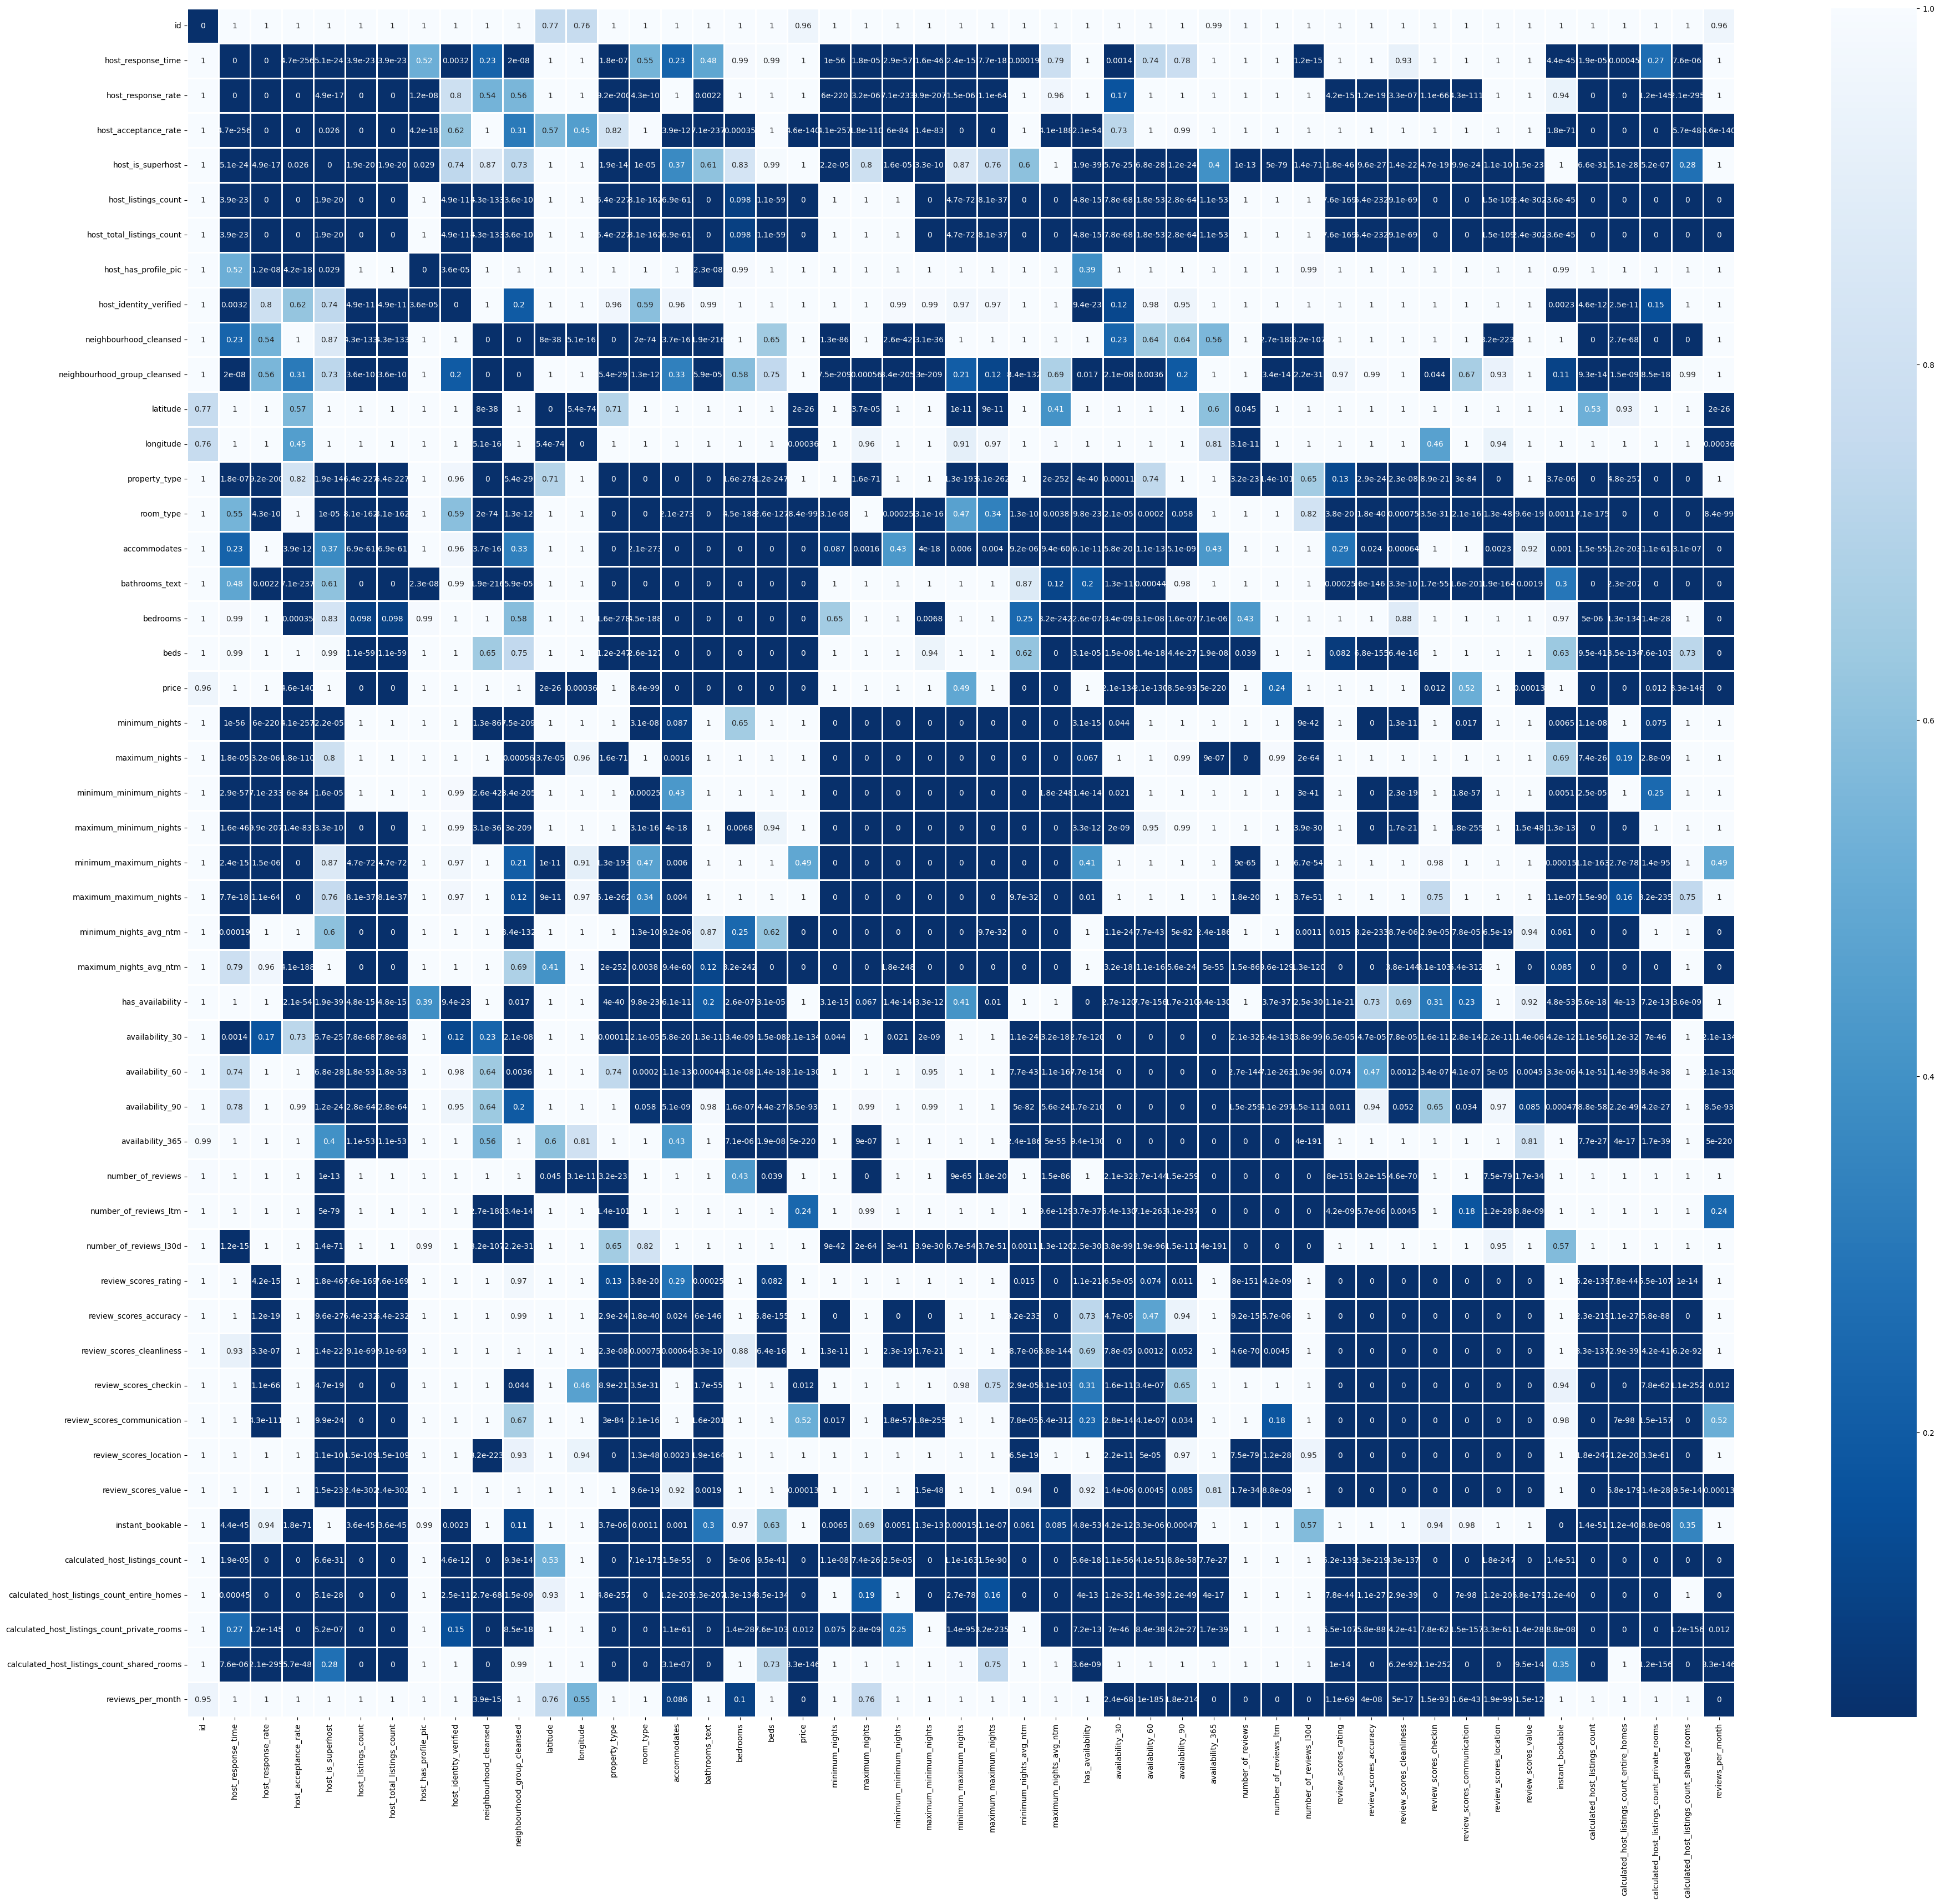

In [42]:
fig, ax = plt.pyplot.subplots(figsize=(45,40))
sns.heatmap(resultant, cmap="Blues_r", vmin=0.04, annot=True, linewidths=1, ax=ax)

In [ ]:
# for i in list(df.columns):
#   p_val = calculate_p_value(i, 'price', df)
#   resultant.loc[i,0] = p_val

# print(tabulate(resultant, headers='keys', tablefmt='psql'))